## Exploratory Data Analysis of datasets

In [1]:
# import packages
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

### SQuAD2.0 dataset

In [4]:
# Load and merge SQuAD2.0 train and dev sets, then use only the merged set for all analysis

def load_squad_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        squad_dict = json.load(f)
    data = []
    for article in squad_dict['data']:
        title = article.get('title', None)
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                qid = qa['id']
                is_impossible = qa.get('is_impossible', False)
                if is_impossible:
                    answers = []
                else:
                    answers = [ans['text'] for ans in qa['answers']]
                data.append({
                    'id': qid,
                    'title': title,
                    'question': question,
                    'context': context,
                    'answers': answers,
                    'is_impossible': is_impossible
                })
    return pd.DataFrame(data)

# File paths
squad_train_file = 'data/SQuAD2_train-v2.0.json'
squad_dev_file = 'data/SQuAD2_dev-v2.0.json'

# Load datasets
train_df_squad = load_squad_dataset(squad_train_file)
dev_df_squad = load_squad_dataset(squad_dev_file)

# Merge train and dev sets
squad_df = pd.concat([train_df_squad, dev_df_squad], ignore_index=True)
squad_df.to_csv('data/SQuAD2_merged.csv', index=False)

# Display shape and head for verification
print("Merged SQuAD shape:", squad_df.shape)
print(squad_df.head())

Merged SQuAD shape: (142192, 6)
                         id    title  \
0  56be85543aeaaa14008c9063  Beyoncé   
1  56be85543aeaaa14008c9065  Beyoncé   
2  56be85543aeaaa14008c9066  Beyoncé   
3  56bf6b0f3aeaaa14008c9601  Beyoncé   
4  56bf6b0f3aeaaa14008c9602  Beyoncé   

                                            question  \
0           When did Beyonce start becoming popular?   
1  What areas did Beyonce compete in when she was...   
2  When did Beyonce leave Destiny's Child and bec...   
3      In what city and state did Beyonce  grow up?    
4         In which decade did Beyonce become famous?   

                                             context                answers  \
0  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...    [in the late 1990s]   
1  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...  [singing and dancing]   
2  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...                 [2003]   
3  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...       [Houston, Texas

Saved dataset summary to tables/SQuAD/squad2_summary_stats.csv


/var/folders/mf/zdrsq7ms1cs8nyqwtp9c01th0000gp/T/ipykernel_8633/2291642150.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Answerable", "Unanswerable"],


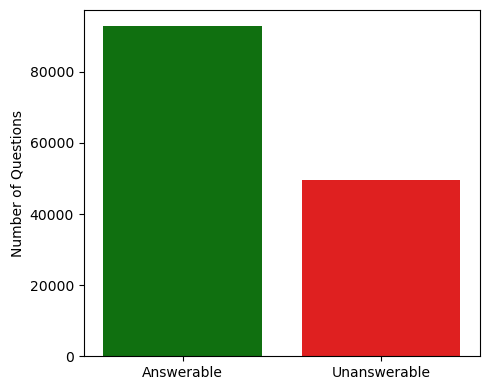

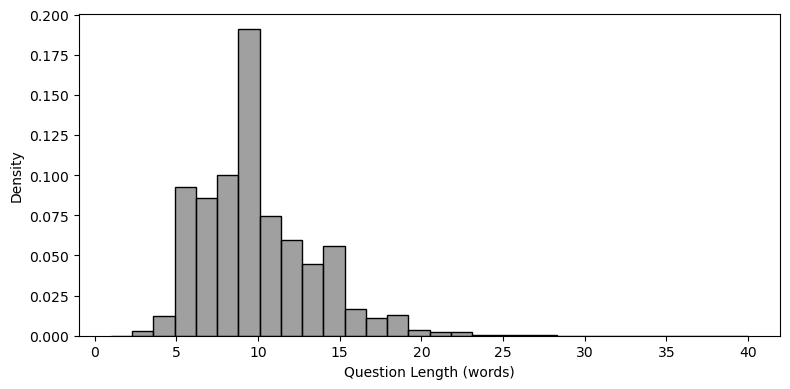

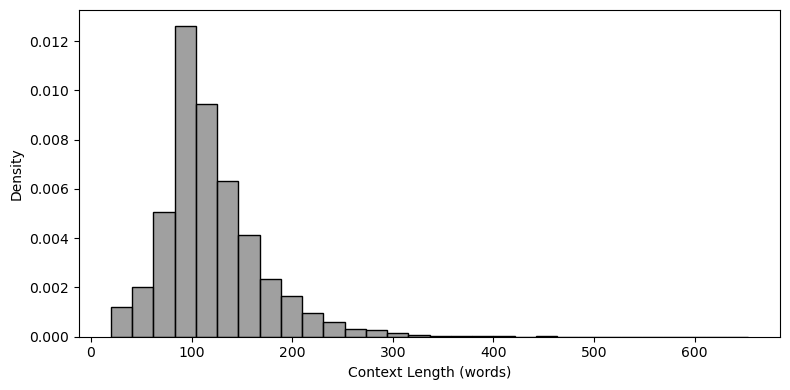

  Dataset  Total Questions  Answerable Questions  Unanswerable Questions  \
0  Merged           142192                 92749                   49443   

   Avg Answers per Answerable Question  Avg Question Length (words)  \
0                             1.154977                     9.904327   

   Avg Context Length (words)  
0                  120.306768  


In [7]:
# Create output folders if they don't exist
os.makedirs("figures/SQuAD", exist_ok=True)
os.makedirs("tables/SQuAD", exist_ok=True)

# Function to compute dataset stats
def compute_stats(df, name):
    total_questions = len(df)
    unanswerable_count = df['is_impossible'].sum()
    answerable_count = total_questions - unanswerable_count
    avg_answers_per_question = df[df['is_impossible'] == False]['answers'].apply(len).mean()
    avg_question_length = df['question'].apply(lambda x: len(x.split())).mean()
    avg_context_length = df['context'].apply(lambda x: len(x.split())).mean()
    return {
        'Dataset': name,
        'Total Questions': total_questions,
        'Answerable Questions': answerable_count,
        'Unanswerable Questions': unanswerable_count,
        'Avg Answers per Answerable Question': avg_answers_per_question,
        'Avg Question Length (words)': avg_question_length,
        'Avg Context Length (words)': avg_context_length
    }

# Compute stats for merged SQuAD
stats_squad = compute_stats(squad_df, "Merged")
stats_df_squad = pd.DataFrame([stats_squad])

# Save stats table
stats_df_squad.to_csv("tables/SQuAD/squad2_summary_stats.csv", index=False)
print("Saved dataset summary to tables/SQuAD/squad2_summary_stats.csv")

# ----------- Visualization 1: Answerable vs Unanswerable ------------
plt.figure(figsize=(5, 4))
sns.barplot(x=["Answerable", "Unanswerable"],
            y=[stats_squad['Answerable Questions'], stats_squad['Unanswerable Questions']],
            palette=["green", "red"])
plt.ylabel("Number of Questions")
# plt.title("Answerable vs Unanswerable Questions")
plt.tight_layout()
plt.savefig("figures/SQuAD/answerable_vs_unanswerable.png")
plt.show()

# ----------- Visualization 2: Question Length Distribution ------------
plt.figure(figsize=(8, 4))
sns.histplot(squad_df['question'].apply(lambda x: len(x.split())), kde=False, bins=30, color='grey', stat="density")
plt.xlabel("Question Length (words)")
plt.ylabel("Density")
# plt.title("Distribution of Question Lengths")
plt.tight_layout()
plt.savefig("figures/SQuAD/question_length_distribution.png")
plt.show()

# ----------- Visualization 3: Context Length Distribution ------------
plt.figure(figsize=(8, 4))
sns.histplot(squad_df['context'].apply(lambda x: len(x.split())), kde=False, bins=30, color='grey', stat="density")
plt.xlabel("Context Length (words)")
plt.ylabel("Density")
# plt.title("Distribution of Context Lengths")
plt.tight_layout()
plt.savefig("figures/SQuAD/context_length_distribution.png")
plt.show()

print(stats_df_squad)

C:\Users\Chris\AppData\Local\Temp\ipykernel_26224\4013852126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


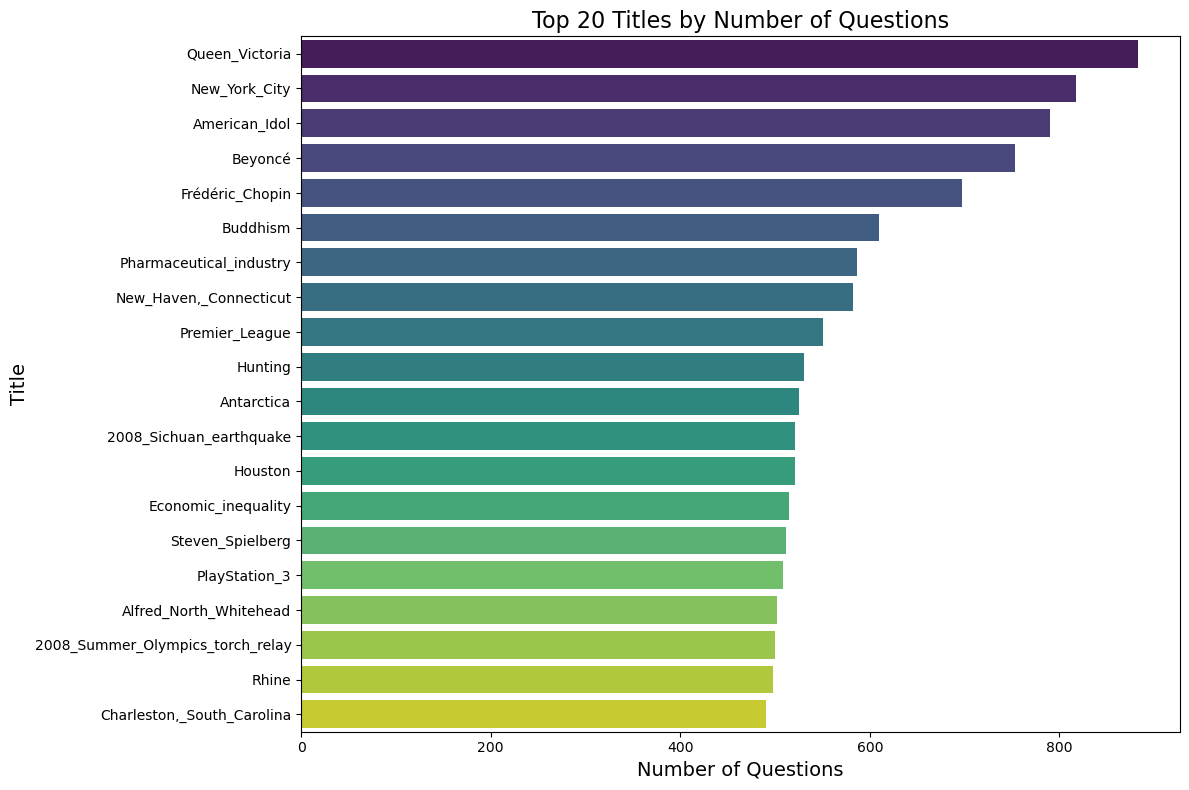

Title distribution statistics:
   Total unique titles  Average questions per title  \
0                  477                   298.096436   

   Median questions per title  Max questions per title  \
0                       282.0                      883   

   Min questions per title  Std Dev of questions per title  
0                       36                      107.984316  


In [4]:
# Create a visualization of counts per title in merged SQuAD dataset

# Count questions per title
title_counts = squad_df['title'].value_counts()

# Visualize the top 20 titles by question count
plt.figure(figsize=(12, 8))
top_titles = title_counts[:20]
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 20 Titles by Number of Questions', fontsize=16)
plt.xlabel('Number of Questions', fontsize=14)
plt.ylabel('Title', fontsize=14)
plt.tight_layout()
plt.savefig("figures/SQuAD/title_distribution.png")
plt.show()

# Calculate statistics about title distribution
title_stats = {
    'Total unique titles': len(title_counts),
    'Average questions per title': title_counts.mean(),
    'Median questions per title': title_counts.median(),
    'Max questions per title': title_counts.max(),
    'Min questions per title': title_counts.min(),
    'Std Dev of questions per title': title_counts.std()
}

# Display statistics as a DataFrame
title_stats_df = pd.DataFrame([title_stats])
print("Title distribution statistics:")
print(title_stats_df)

# Save statistics to CSV
title_stats_df.to_csv("tables/SQuAD/title_distribution_stats.csv", index=False)

In [8]:
# --- Create example instance table from merged SQuAD ---
example_squad = squad_df[squad_df['answers'].apply(lambda x: len(x) > 0)].iloc[0]
example_table_squad = pd.DataFrame({
    "Title": [example_squad['title']],
    "Context": [example_squad['context']],
    "Question": [example_squad['question']],
    "Answer": [example_squad['answers'][0]]
})
example_table_squad.to_csv("tables/SQuAD/squad2_example_instance.csv", index=False)
example_table_squad

,Title,Context,Question,Answer
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,in the late 1990s


In [9]:
# Concatenate text of all rows in each column for merged SQuAD
all_context_text_squad = ' '.join(squad_df["context"].tolist())
all_question_text_squad = ' '.join(squad_df["question"].tolist())
all_answer_text_squad = ' '.join(squad_df["answers"].apply(lambda x: ' '.join(x)).tolist())

# Calculate word frequency using Counter
context_word_freq_squad = Counter(all_context_text_squad.split())
question_word_freq_squad = Counter(all_question_text_squad.split())
answer_word_freq_squad = Counter(all_answer_text_squad.split())

# Get the top 15 most frequent words for each column
top_context_words_squad = dict(context_word_freq_squad.most_common(15))
top_question_words_squad = dict(question_word_freq_squad.most_common(15))
top_answer_words_squad = dict(answer_word_freq_squad.most_common(15))

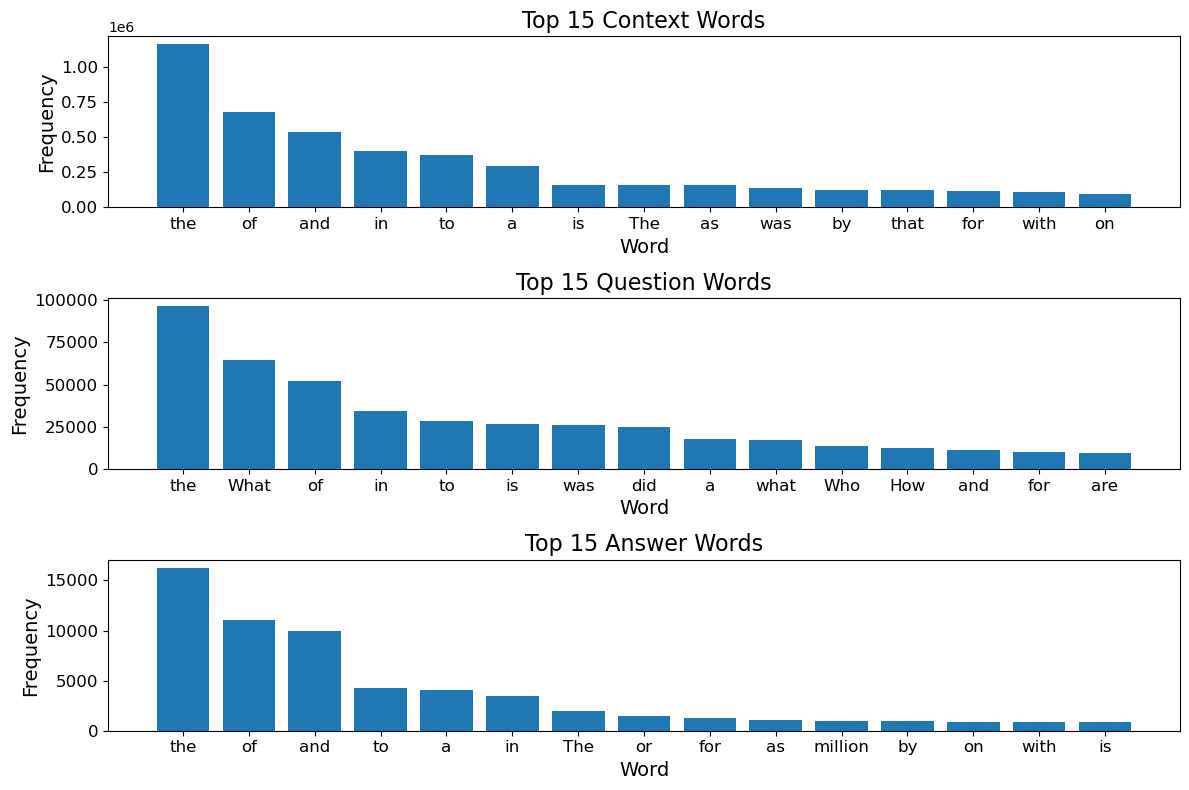

In [10]:
# Plot bar plots for merged SQuAD
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].bar(top_context_words_squad.keys(), top_context_words_squad.values())
axs[0].set_title("Top 15 Context Words", fontsize=16)
axs[0].set_xlabel("Word", fontsize=14)
axs[0].set_ylabel("Frequency", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1].bar(top_question_words_squad.keys(), top_question_words_squad.values())
axs[1].set_title("Top 15 Question Words", fontsize=16)
axs[1].set_xlabel("Word", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].bar(top_answer_words_squad.keys(), top_answer_words_squad.values())
axs[2].set_title("Top 15 Answer Words", fontsize=16)
axs[2].set_xlabel("Word", fontsize=14)
axs[2].set_ylabel("Frequency", fontsize=14)
axs[2].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig("figures/SQuAD/train_word_frequency.png")
plt.show()

In [11]:
# Function to generate word cloud from word frequency and save the plot (merged SQuAD)
def generate_wordcloud_and_save(word_freq, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f"figures/SQuAD/{filename}")
    plt.close()
    plt.show()

# Generate word clouds and save plots
generate_wordcloud_and_save(context_word_freq_squad, "context_wordcloud.png")
generate_wordcloud_and_save(question_word_freq_squad, "question_wordcloud.png")

### TriviaQA

In [12]:
# --- TriviaQA: Use only merged DataFrame for all analysis ---

def load_triviaqa_dataset(file_path):
    import json
    import pandas as pd
    with open(file_path, 'r', encoding='utf-8') as f:
        data_dict = json.load(f)
    data = []
    for item in data_dict.get('Data', []):
        question = item.get('Question', None)
        question_id = item.get('QuestionId', None)
        question_source = item.get('QuestionSource', None)
        answers = []
        answer_dict = item.get('Answer', {})
        if isinstance(answer_dict, dict):
            if 'NormalizedValue' in answer_dict and answer_dict['NormalizedValue']:
                answers.append(answer_dict['NormalizedValue'])
            if 'Aliases' in answer_dict and answer_dict['Aliases']:
                answers.extend(answer_dict['Aliases'])
            if 'NormalizedAliases' in answer_dict and answer_dict['NormalizedAliases']:
                answers.extend(answer_dict['NormalizedAliases'])
        answers = list(set(filter(None, answers)))
        data.append({
            'question': question,
            'question_id': question_id,
            'question_source': question_source,
            'answers': answers
        })
    df = pd.DataFrame(data)
    df['answers'] = df['answers'].apply(lambda x: list(set(filter(None, x))))
    return df

# File paths
trivia_train_file = 'data/triviaqa-unfiltered/unfiltered-web-train.json'
trivia_dev_file = 'data/triviaqa-unfiltered/unfiltered-web-dev.json'

# Load and merge datasets
train_df_trivia = load_triviaqa_dataset(trivia_train_file)
dev_df_trivia = load_triviaqa_dataset(trivia_dev_file)
trivia_df = pd.concat([train_df_trivia, dev_df_trivia], ignore_index=True)
trivia_df.to_csv('data/triviaqa-unfiltered/trivia_all.csv', index=False)

# Display shape and head for verification
print("Train TriviaQA shape:", train_df_trivia.shape)
print("Dev TriviaQA shape:", dev_df_trivia.shape)
print("Merged TriviaQA shape:", trivia_df.shape)
print(trivia_df.head())

Train TriviaQA shape: (87622, 4)
Dev TriviaQA shape: (11313, 4)
Merged TriviaQA shape: (98935, 4)
                                            question question_id  \
0  Who was President when the first Peanuts carto...        tc_0   
1  Which American-born Sinclair won the Nobel Pri...        tc_1   
2         Where in England was Dame Judi Dench born?        tc_3   
3  William Christensen of Madison, New Jersey, ha...        tc_4   
4  In which decade did Billboard magazine first p...        tc_5   

                 question_source  \
0  http://www.triviacountry.com/   
1  http://www.triviacountry.com/   
2  http://www.triviacountry.com/   
3  http://www.triviacountry.com/   
4  http://www.triviacountry.com/   

                                             answers  
0  [h s truman, harry truman s, harry solomon tru...  
1  [Grace Hegger, Sinclair Lewis, harry sinclair ...  
2  [park grove school, york north yorkshire, Eofo...  
3                             [Beer Cans, beer cans]  
4

In [13]:
trivia_df.loc[98930]

question           Who tried to steal Christmas from the town of ...
question_id                                                  qg_4615
question_source                       https://quizguy.wordpress.com/
answers                     [The grinch, Grinch, grinch, The Grinch]
Name: 98930, dtype: object

In [14]:
print(trivia_df.loc[98930]["question"])
print(trivia_df.loc[98930]["answers"])

Who tried to steal Christmas from the town of Whoville?
['The grinch', 'Grinch', 'grinch', 'The Grinch']


In [15]:
# Create output folders for comparison
os.makedirs("tables/Comparison", exist_ok=True)
os.makedirs("figures/Comparison", exist_ok=True)

# Calculate and compare statistics between SQuAD and TriviaQA datasets
comparison_stats = pd.DataFrame({
    'Dataset': ['SQuAD 2.0', 'TriviaQA'],
    'Total Questions': [squad_df.shape[0], trivia_df.shape[0]],
    'Avg Question Length (words)': [
        squad_df['question'].apply(lambda x: len(x.split())).mean(),
        trivia_df['question'].apply(lambda x: len(x.split())).mean()
    ],
    'Avg Answers per Question': [
        squad_df[~squad_df['is_impossible']]['answers'].apply(len).mean(),
        trivia_df['answers'].apply(len).mean()
    ],
    'Has Context': ['Yes', 'No'],
    'Has Unanswerable Questions': ['Yes', 'No']
})

# Print the comparison statistics
print("Dataset Comparison:")
print(comparison_stats)

Dataset Comparison:
     Dataset  Total Questions  Avg Question Length (words)  \
0  SQuAD 2.0           142192                     9.904327   
1   TriviaQA            98935                    13.987113   

   Avg Answers per Question Has Context Has Unanswerable Questions  
0                  1.154977         Yes                        Yes  
1                 24.910608          No                         No  


Saved dataset summary to tables/TriviaQA/triviaqa_summary_stats.csv


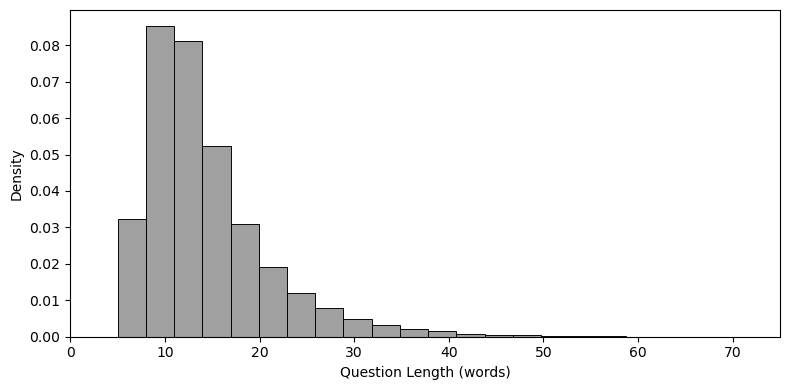

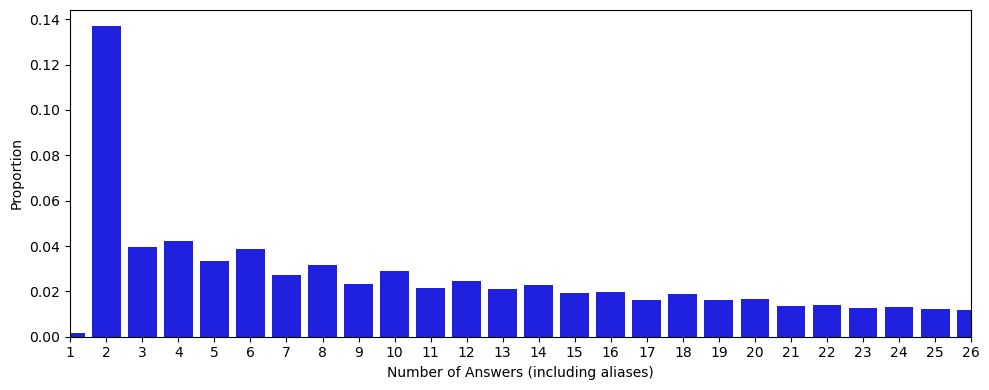

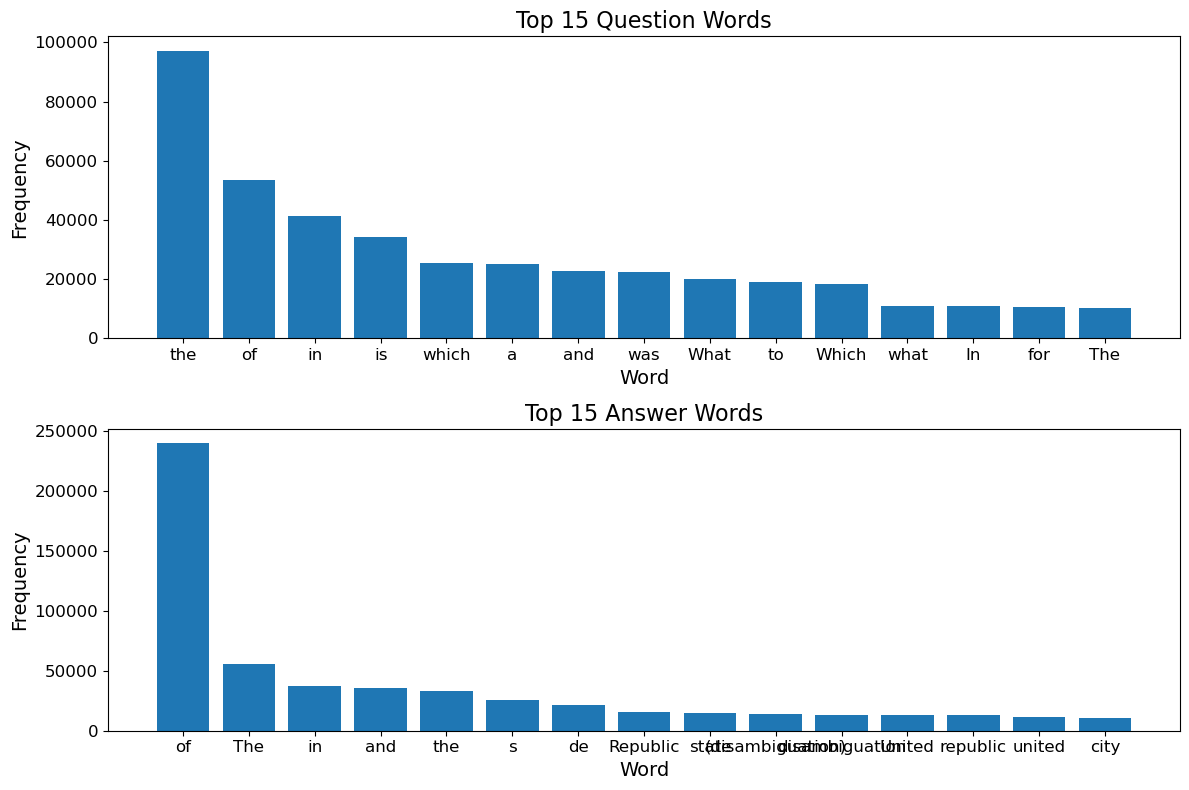


Example Instance:
                                            Question  \
0  Who was President when the first Peanuts carto...   

                                             Answers  
0  h s truman, harry truman s, harry solomon trum...  


In [17]:
# Create output folders
os.makedirs("figures/TriviaQA", exist_ok=True)
os.makedirs("tables/TriviaQA", exist_ok=True)

# Compute dataset statistics for merged TriviaQA
def compute_triviaqa_stats(df, name):
    total_questions = len(df)
    avg_answers_per_question = df['answers'].apply(len).mean()
    avg_question_length = df['question'].apply(lambda x: len(x.split())).mean()
    return {
        'Dataset': name,
        'Total Questions': total_questions,
        'Avg Answers per Question': avg_answers_per_question,
        'Avg Question Length (words)': avg_question_length,
    }

stats_trivia = compute_triviaqa_stats(trivia_df, "Merged")
stats_df_trivia = pd.DataFrame([stats_trivia])
stats_df_trivia.to_csv("tables/TriviaQA/triviaqa_summary_stats.csv", index=False)
print("Saved dataset summary to tables/TriviaQA/triviaqa_summary_stats.csv")

# Visualization 2: Question Length Distribution (Merged)
plt.figure(figsize=(8, 4))
sns.histplot(trivia_df['question'].apply(lambda x: len(x.split())), kde=False, bins=60, color='grey', stat="density")
plt.xlabel("Question Length (words)")
plt.ylabel("Density")
plt.xlim(0, 75)
# plt.title("Distribution of Question Lengths")
plt.tight_layout()
plt.savefig("figures/TriviaQA/question_length_distribution.png")
plt.show()

# Visualization 3: Number of Answers Distribution (Merged)
plt.figure(figsize=(10, 4))
answers_count_trivia = trivia_df['answers'].apply(len).value_counts().sort_index()
counts_data_trivia = pd.DataFrame({
    'Count': answers_count_trivia.index,
    'Proportion': answers_count_trivia.values / len(trivia_df)
})
sns.barplot(data=counts_data_trivia, x='Count', y='Proportion', color='blue')
plt.xlabel("Number of Answers (including aliases)")
plt.ylabel("Proportion")
plt.xlim(0, 25)
# plt.title("Distribution of Answer Counts")
plt.tight_layout()
plt.savefig("figures/TriviaQA/answer_count_distribution.png")
plt.show()

# Word frequency analysis (Merged)
all_question_text_trivia = ' '.join(trivia_df["question"].tolist())
all_answer_text_trivia = ' '.join(trivia_df["answers"].apply(lambda x: ' '.join(x)).tolist())
question_word_freq_trivia = Counter(all_question_text_trivia.split())
answer_word_freq_trivia = Counter(all_answer_text_trivia.split())
top_question_words_trivia = dict(question_word_freq_trivia.most_common(15))
top_answer_words_trivia = dict(answer_word_freq_trivia.most_common(15))

# Plot word frequencies (Merged)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.bar(top_question_words_trivia.keys(), top_question_words_trivia.values())
ax1.set_title("Top 15 Question Words", fontsize=16)
ax1.set_xlabel("Word", fontsize=14)
ax1.set_ylabel("Frequency", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.bar(top_answer_words_trivia.keys(), top_answer_words_trivia.values())
ax2.set_title("Top 15 Answer Words", fontsize=16)
ax2.set_xlabel("Word", fontsize=14)
ax2.set_ylabel("Frequency", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig("figures/TriviaQA/word_frequency.png")
plt.show()

# Generate and save word clouds
def generate_wordcloud_and_save_trivia(word_freq, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f"figures/TriviaQA/{filename}")
    plt.close()
    plt.show()

generate_wordcloud_and_save_trivia(question_word_freq_trivia, "question_wordcloud.png")
generate_wordcloud_and_save_trivia(answer_word_freq_trivia, "answer_wordcloud.png")

# Create example instance table (Merged)
example_trivia = trivia_df.iloc[0]
example_table_trivia = pd.DataFrame({
    "Question": [example_trivia['question']],
    "Answers": [', '.join(example_trivia['answers'])]
})
example_table_trivia.to_csv("tables/TriviaQA/triviaqa_example_instance.csv", index=False)
print("\nExample Instance:")
print(example_table_trivia)

## BoolQ dataset
Reading comprehension dataset designed to test if models can answer yes/no questions based on a given passage of text. Each observation includes:
- question: a yes/no question
- passage: a paragraph from a Wikipedia article
- answer: either true or false

In [18]:
# Load BoolQ dataset
train_boolQ = pd.read_json('data/boolQ_train.jsonl', lines=True)
dev_boolQ = pd.read_json('data/boolQ_dev.jsonl', lines=True)

train_boolQ.head()
print(len(train_boolQ))
dev_boolQ.head()
print(len(dev_boolQ))

# Merge train and dev datasets
boolQ = pd.concat([train_boolQ, dev_boolQ], ignore_index=True)

# Display a true example
true_example = boolQ[boolQ['answer'] == True].iloc[1]
print(true_example["question"], true_example["answer"], true_example["passage"])

false_example = boolQ[boolQ['answer'] == False].iloc[0]
print(false_example["question"], false_example["answer"], false_example["passage"])

# Get the number of examples in the dataset
print(len(boolQ))

# Count the number of true and false answers
true_count = boolQ[boolQ['answer'] == True].shape[0]
false_count = boolQ[boolQ['answer'] == False].shape[0]
print(f"Number of true answers: {true_count}")
print(f"Number of false answers: {false_count}")

# Create "context" column by copying the "passage" column
boolQ['context'] = boolQ['passage']

# Save boolQ to a new file as csv
boolQ.to_csv('data/boolQ.csv', index=False)

9427
3270
do good samaritan laws protect those who help at an accident True Good Samaritan laws offer legal protection to people who give reasonable assistance to those who are, or who they believe to be, injured, ill, in peril, or otherwise incapacitated. The protection is intended to reduce bystanders' hesitation to assist, for fear of being sued or prosecuted for unintentional injury or wrongful death. An example of such a law in common-law areas of Canada: a good Samaritan doctrine is a legal principle that prevents a rescuer who has voluntarily helped a victim in distress from being successfully sued for wrongdoing. Its purpose is to keep people from being reluctant to help a stranger in need for fear of legal repercussions should they make some mistake in treatment. By contrast, a duty to rescue law requires people to offer assistance and holds those who fail to do so liable.
is elder scrolls online the same as skyrim False As with other games in The Elder Scrolls series, the gam

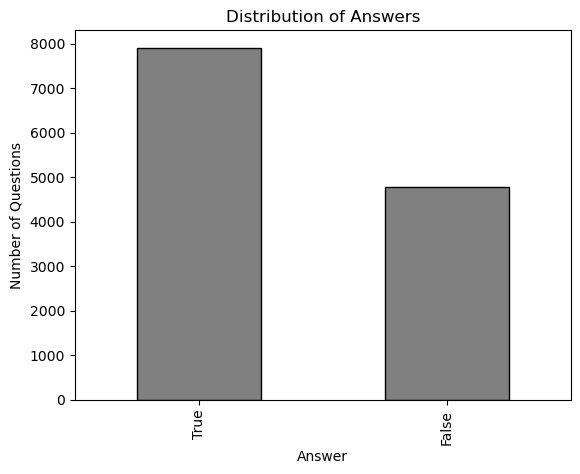

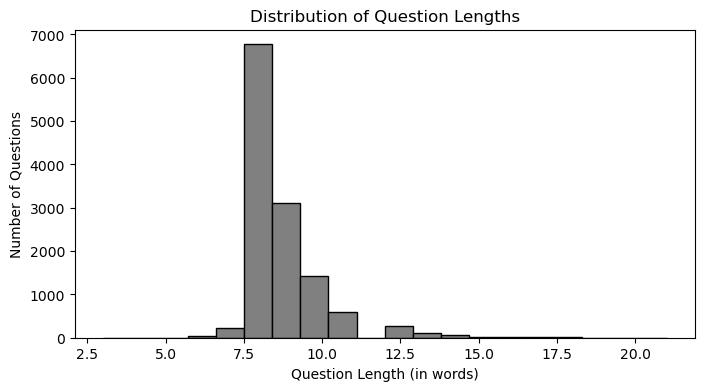

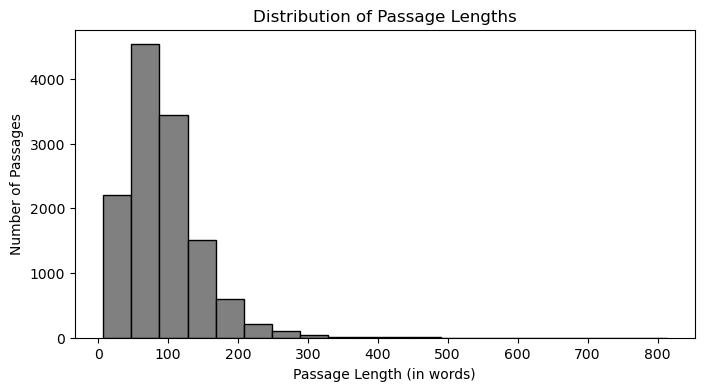

<Figure size 800x400 with 0 Axes>

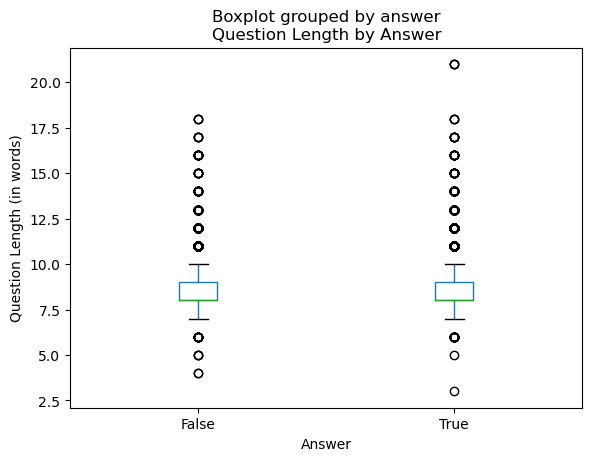

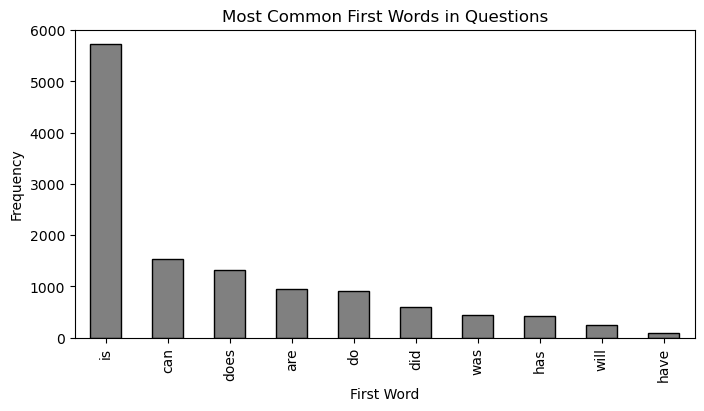

In [20]:
# Balance of true/false answers
boolQ['answer'].value_counts().plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('Answer')
plt.ylabel('Number of Questions')
plt.title('Distribution of Answers')
plt.savefig("figures/BoolQ/boolq_number_questions.png")
plt.show()

# Question length distribution
plt.figure(figsize=(8, 4))
boolQ['question_length'] = boolQ['question'].apply(lambda x: len(x.split()))
boolQ['question_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Question Length (in words)')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Lengths')
plt.savefig("figures/BoolQ/boolq_question_length.png")
plt.show()

# Passage length distribution
plt.figure(figsize=(8, 4))
boolQ['passage_length'] = boolQ['passage'].apply(lambda x: len(x.split()))
boolQ['passage_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Passage Length (in words)')
plt.ylabel('Number of Passages')
plt.title('Distribution of Passage Lengths')
plt.savefig("figures/BoolQ/boolq_passage_length.png")
plt.show()

# Compare lengths by answer
plt.figure(figsize=(8, 4))
boolQ.boxplot(column='question_length', by='answer', grid=False)
plt.xlabel('Answer')
plt.ylabel('Question Length (in words)')
plt.title('Question Length by Answer')
plt.show()

# Most common question words
plt.figure(figsize=(8, 4))
boolQ['first_word'] = boolQ['question'].apply(lambda x: x.split()[0].lower())
boolQ['first_word'].value_counts().head(10).plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('First Word')
plt.ylabel('Frequency')
plt.title('Most Common First Words in Questions')
plt.savefig("figures/BoolQ/boolq_first_words.png")
plt.show()


# GSM8K dataset
Dataset with grade school math word problems where each problem requires multi-step reasoning to solve it. It contains:
- question: math word problem
- answer: natural language explanation ending with the final answer

In [21]:
# Load GSM8k dataset
from datasets import load_dataset, concatenate_datasets

gsm8k = load_dataset("gsm8k", "main")
gsm8k = concatenate_datasets([gsm8k['train'], gsm8k['test']]).to_pandas()

print(gsm8k.head())
print(len(gsm8k))

example_gsm8k = gsm8k.iloc[5]
print(example_gsm8k['question'])
print(example_gsm8k['answer'])

README.md: 0.00B [00:00, ?B/s]

main/train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

main/test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

                                            question  \
0  Natalia sold clips to 48 of her friends in Apr...   
1  Weng earns $12 an hour for babysitting. Yester...   
2  Betty is saving money for a new wallet which c...   
3  Julie is reading a 120-page book. Yesterday, s...   
4  James writes a 3-page letter to 2 different fr...   

                                              answer  
0  Natalia sold 48/2 = <<48/2=24>>24 clips in May...  
1  Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...  
2  In the beginning, Betty has only 100 / 2 = $<<...  
3  Maila read 12 x 2 = <<12*2=24>>24 pages today....  
4  He writes each friend 3*2=<<3*2=6>>6 pages a w...  
8792
Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow, and there are 80% more of those in purple. There are only 25% as many green flowers as there are yellow and purple flowers. How many flowers does Mark have in his garden?
There are 80/100 * 10 = <<80/100*10=8>>8 more purp

In [22]:
# Save gsm8k as csv
gsm8k.to_csv('data/gsm8k.csv', index=False)

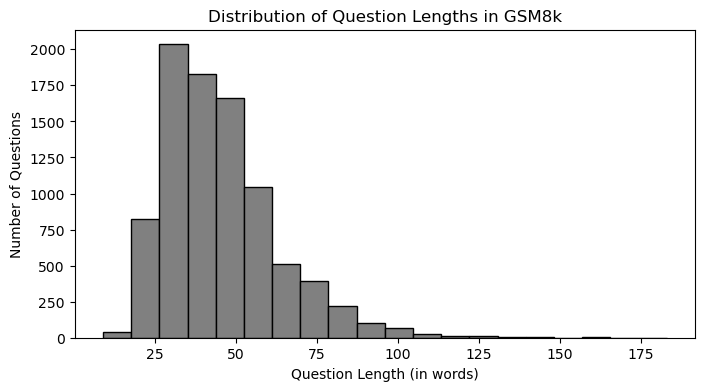

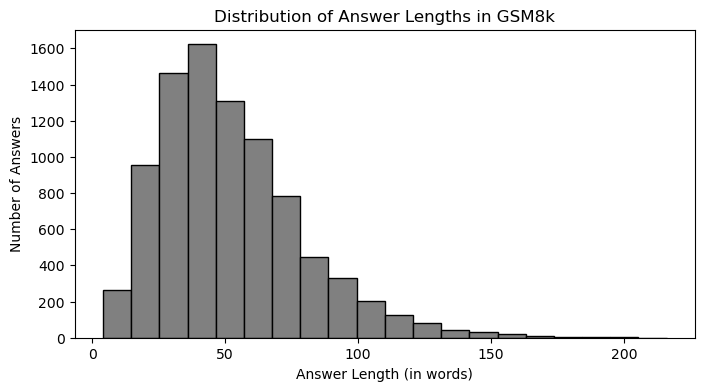

In [24]:
# Question length distribution
plt.figure(figsize=(8, 4))
gsm8k['question_length'] = gsm8k['question'].apply(lambda x: len(x.split()))
gsm8k['question_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Question Length (in words)')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Lengths in GSM8k')
plt.savefig("figures/GSM8k/gsm8k_question_length.png")
plt.show()

# Answer length distribution
plt.figure(figsize=(8, 4))
gsm8k['answer_length'] = gsm8k['answer'].apply(lambda x: len(x.split()))
gsm8k['answer_length'].hist(bins=20, grid=False, color='grey', edgecolor='black')
plt.xlabel('Answer Length (in words)')
plt.ylabel('Number of Answers')
plt.title('Distribution of Answer Lengths in GSM8k')
plt.savefig("figures/GSM8k/gsm8k_answer_length.png")
plt.show()

In [25]:
# Extract numeric answers (after the ####)
gsm8k['numeric_answer'] = gsm8k['answer'].apply(lambda x: x.split('####')[-1].strip() if '####' in x else None)

# Remove commas from numeric answers
gsm8k['numeric_answer'] = gsm8k['numeric_answer'].str.replace(',', '', regex=False)

# check if all numeric answers are valid numbers (any positive or negative float)
for i, answer in enumerate(gsm8k['numeric_answer']):
    try:
        float(answer)
    except (ValueError, TypeError):
        print(f"Invalid numeric answer at index {i}: {answer}")
print(gsm8k['numeric_answer'].head())

# Save gsm8k with numeric answers as csv
gsm8k.to_csv('data/gsm8k_cleaned.csv', index=False)

0     72
1     10
2      5
3     42
4    624
Name: numeric_answer, dtype: object
